In [1]:
import torch

# 1. Making Predictions

In [2]:
## w, b : parameters
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
# forward 함수 ~= 모델 아키텍쳐
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor([[4],[7]])
forward(x) # prints y

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

# 2. Linear Class

In [5]:
import torch
from torch.nn import Linear

In [6]:
torch.manual_seed(1) # random value 생성을 위한 seed
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([[1],[2.5]]) # input
model(x)

tensor([[0.0739],
        [0.8468]], grad_fn=<AddmmBackward0>)

# 3. Fit Linear Model

## Linear Class

In [8]:
import torch
import torch.nn as nn

In [9]:
class LR(nn.Module): # nn.Module 은 pytorch의 모든 모듈의 베이스 클래스임
    def __init__(self, input_size, output_size):
        super().__init__() # Initialize nn.Module
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [10]:
torch.manual_seed(1)
model = LR(input_size=1, output_size=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

## Create Dataset

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

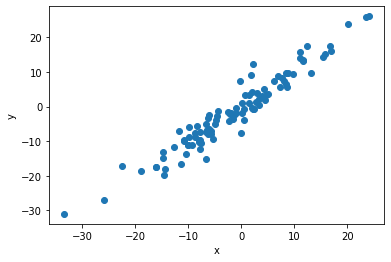

In [13]:
x = torch.randn(100, 1) * 10
y = x + torch.randn(100,1) * 3
plt.plot(x,y, 'o')
plt.xlabel("x")
plt.ylabel("y")

## Plot Initial Model

In [60]:
class LR(nn.Module): # nn.Module 은 pytorch의 모든 모듈의 베이스 클래스임
    def __init__(self, input_size, output_size):
        super().__init__() # Initialize nn.Module
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred
    
    def reset_parameters(self):
        self.linear.reset_parameters()

In [61]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [62]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [63]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, "r")
    plt.scatter(x, y)
    plt.show()

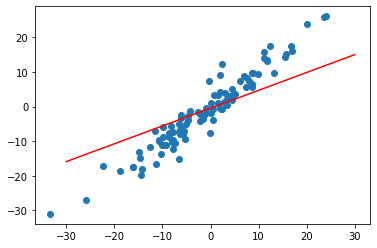

In [65]:
plot_fit("Initial model")

## Training

In [70]:
model.reset_parameters()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # GD는 한번 업데이트를 위해 모든 샘플을 사용해야함. SGD는 한번 업데이트를 위해 하나의 샘플 사용(계산효율적)

In [71]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print(f"epoch: {i}, loss: {loss.item()}")

    losses.append(loss.item())
    optimizer.zero_grad() # set gradients zero
    loss.backward() # Compute derivative
    optimizer.step() # Update parameter

epoch: 0, loss: 426.7626037597656
epoch: 1, loss: 267.881103515625
epoch: 2, loss: 169.38726806640625
epoch: 3, loss: 108.3287124633789
epoch: 4, loss: 70.47697448730469
epoch: 5, loss: 47.01150894165039
epoch: 6, loss: 32.46434783935547
epoch: 7, loss: 23.44580078125
epoch: 8, loss: 17.854530334472656
epoch: 9, loss: 14.38789176940918
epoch: 10, loss: 12.238348007202148
epoch: 11, loss: 10.905299186706543
epoch: 12, loss: 10.078410148620605
epoch: 13, loss: 9.565299034118652
epoch: 14, loss: 9.246705055236816
epoch: 15, loss: 9.048701286315918
epoch: 16, loss: 8.925451278686523
epoch: 17, loss: 8.848548889160156
epoch: 18, loss: 8.800374984741211
epoch: 19, loss: 8.770015716552734
epoch: 20, loss: 8.750702857971191
epoch: 21, loss: 8.738237380981445
epoch: 22, loss: 8.73001766204834
epoch: 23, loss: 8.724435806274414
epoch: 24, loss: 8.720488548278809
epoch: 25, loss: 8.71755599975586
epoch: 26, loss: 8.715255737304688
epoch: 27, loss: 8.713347434997559
epoch: 28, loss: 8.711688041687

Text(0.5, 0, 'Epoch')

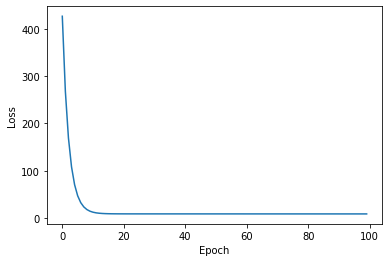

In [72]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

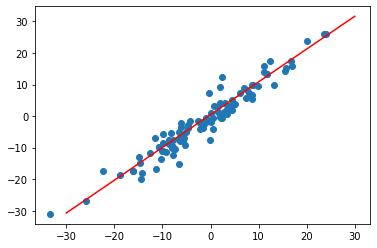

In [73]:
plot_fit("Trained Model")

## Summary

# Appendix

## Gradient Descent

https://datahacker.rs/003-pytorch-how-to-implement-linear-regression-in-pytorch/

![11](https://media5.datahacker.rs/2021/01/157-2048x1206.jpg)

![](https://media5.datahacker.rs/2021/01/ezgif.com-gif-maker.gif)

## Mean Squared Error

![aa](https://miro.medium.com/max/1280/1*nhGPRU12caIw7NK5Rr3p-w.gif)

![](https://blog.kakaocdn.net/dn/bXwO2x/btrub83d6IJ/YGi4ZTyWxCAcR0vdfW8UYK/img.png)